# Melbourne Housing Snapshot

The purpose of this is to perform exploratory data analysis on the Melbourne Housing dataset to identify trends and patterns regarding housing price in relation to number of rooms (Bed and Bath), car parking, distance to CBD (Central Business District), etc. The dataset was taken from kaggle.

**Problems with the dataset**
- Building Area > Landsize
- Building Area and Landsize has values of 0

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Melbourne_Housing\melb_data.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Cleaning Data
- Check for duplicates and drop the last occurence
- Check for null values and drop the rows
- Replace any incorrect data
- Drop unwanted columns

In [5]:
# Drop unecessary columns
df_clean = df.drop(columns=['Lattitude', 'Longtitude', 'YearBuilt', 'CouncilArea', 'Method', 'Date', 'Postcode'])

In [6]:
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Regionname',
       'Propertycount'],
      dtype='object')

In [7]:
# Check for null values in all columns
df_clean.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
Regionname          0
Propertycount       0
dtype: int64

In [9]:
# Drop all rows where BuildingArea is null
df_clean = df_clean.dropna(subset=['BuildingArea'])

In [10]:
df_clean.isna().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
SellerG           0
Distance          0
Bedroom2          0
Bathroom          0
Car              29
Landsize          0
BuildingArea      0
Regionname        0
Propertycount     0
dtype: int64

In [15]:
# Replace nulls in Car column with 0
df_clean[df_clean['Car'].isna()] = 0

In [16]:
df_clean.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Regionname       0
Propertycount    0
dtype: int64

In [18]:
# Check if there are negative rooms, price, distance, carspots, landsize, etc.
df_clean.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,7130.000000,7.130000e+03,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000
mean,2.967181,1.074241e+06,10.125863,2.940393,1.594670,1.604628,488.259046,151.510146,7401.719355
std,0.988099,6.770286e+05,6.044035,0.987910,0.726683,0.948857,1036.592223,541.092812,4364.161874
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.292500e+05,6.100000,2.000000,1.000000,1.000000,163.000000,92.000000,4380.000000
50%,3.000000,8.900000e+05,9.200000,3.000000,1.000000,2.000000,400.000000,126.000000,6543.000000
75%,4.000000,1.330000e+06,13.000000,4.000000,2.000000,2.000000,638.000000,174.000000,10175.000000
max,8.000000,9.000000e+06,48.100000,9.000000,8.000000,10.000000,44500.000000,44515.000000,21650.000000


There are housing where there are 0 bedrooms, bathrooms, landsize, and building area - that doesnt make any sense.

In [19]:
# Make sure BuildingArea and Landsize are greater than 0
df_clean = df_clean[df_clean['BuildingArea'] > 0]

In [20]:
df_clean = df_clean[(df_clean['Landsize'] > 0)]

In [21]:
df_clean.describe()
df_clean.shape

(6023, 14)

In [22]:
# Make sure that landsize is greater than BuildingArea
df_clean = df_clean[df_clean['BuildingArea'] >= df_clean['Landsize']]

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 2 to 13437
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         309 non-null    object 
 1   Address        309 non-null    object 
 2   Rooms          309 non-null    int64  
 3   Type           309 non-null    object 
 4   Price          309 non-null    float64
 5   SellerG        309 non-null    object 
 6   Distance       309 non-null    float64
 7   Bedroom2       309 non-null    float64
 8   Bathroom       309 non-null    float64
 9   Car            309 non-null    float64
 10  Landsize       309 non-null    float64
 11  BuildingArea   309 non-null    float64
 12  Regionname     309 non-null    object 
 13  Propertycount  309 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 36.2+ KB


In [25]:
df_clean.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,309.000000,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2.838188,1.130329e+06,7.252427,2.822006,1.773463,1.330097,334.288026,397.926631,7457.498382
std,0.768515,5.764944e+05,5.627671,0.767037,0.624558,0.790220,2530.626964,2564.024923,4165.139912
min,1.000000,2.485000e+05,1.300000,1.000000,1.000000,0.000000,1.000000,15.000000,438.000000
25%,2.000000,7.300000e+05,3.300000,2.000000,1.000000,1.000000,84.000000,112.000000,4898.000000
50%,3.000000,1.000000e+06,6.100000,3.000000,2.000000,1.000000,118.000000,145.000000,6380.000000
75%,3.000000,1.390000e+06,9.900000,3.000000,2.000000,2.000000,190.000000,216.000000,8989.000000
max,5.000000,4.525000e+06,48.100000,5.000000,3.000000,5.000000,44500.000000,44515.000000,21650.000000


In [26]:
# Export to csv
df_clean.to_csv(r'C:\Users\Mouth\Documents\Datasets\Melbourne_Housing\clean_data.csv')

## Exploring the Data
Here we try to identify trends and patterns on the clean dataset

<AxesSubplot:xlabel='Price'>

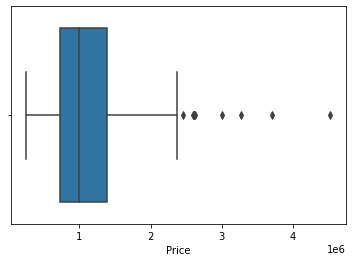

In [27]:
sns.boxplot(x=df_clean['Price'])

In [29]:
df_clean['Price'].describe()

count    3.090000e+02
mean     1.130329e+06
std      5.764944e+05
min      2.485000e+05
25%      7.300000e+05
50%      1.000000e+06
75%      1.390000e+06
max      4.525000e+06
Name: Price, dtype: float64

In [28]:
avg_housing_price = round(df_clean.Price.mean())
avg_housing_price

1130329

The median price for housing in Melbourne seems to be \\$1 million AUD with over 50\% of the housing priced at \\$1 million. The lower quartile is around \\$750,000 while the upper quartile is around \\$1,400,000. The average housing in Melbourne is $1.13 million.

### Price Analysis
 1. What factors influence the property prices the most like (eg. location, number of rooms, distance from CBD, etc.)?
 2. How do prices vary between region and suburb?

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

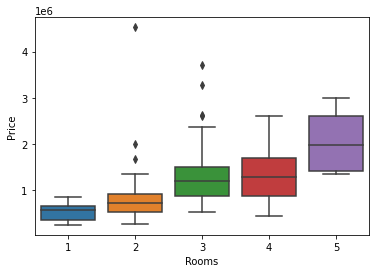

In [30]:
# How does the number of rooms affect housing price?
sns.boxplot(data=df_clean, x='Rooms', y='Price')

As expected, as room numbers increase so does the price of the housing

<AxesSubplot:xlabel='Distance', ylabel='Price'>

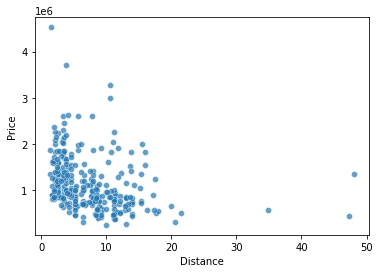

In [31]:
# How does the distance from the Central Business District (CBD) affect housing price?
sns.scatterplot(data=df_clean, x='Distance', y='Price', alpha=0.7)

Obviously, the closer you are to the CBD the more expensive it will be. The majority of housing prices vary between \\$500,000 to \\$2.5 million when you are less than 20km from the CBD

<AxesSubplot:xlabel='Price', ylabel='Regionname'>

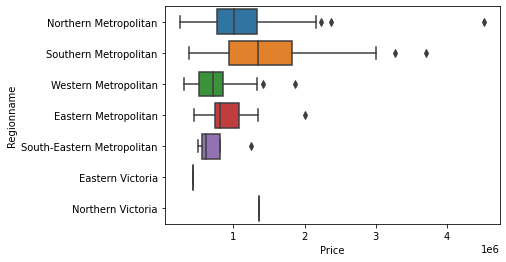

In [32]:
# What are the prices for each region
sns.boxplot(data=df_clean, y='Regionname', x='Price')

In [33]:
# What is the average price for each region in Melbourne?
df_clean.groupby('Regionname')['Price'].agg(['mean', 'min', 'max'])

,mean,min,max
Regionname,,,
Eastern Metropolitan,9.400571e+05,452000.0,2000000.0
Eastern Victoria,4.350000e+05,435000.0,435000.0
Northern Metropolitan,1.080106e+06,248500.0,4525000.0
Northern Victoria,1.355000e+06,1355000.0,1355000.0
South-Eastern Metropolitan,7.456875e+05,503750.0,1241000.0
Southern Metropolitan,1.431864e+06,380000.0,3705000.0
Western Metropolitan,7.384259e+05,305000.0,1860000.0


Text(0.5, 1.0, 'Average Price of Housing Per Region')

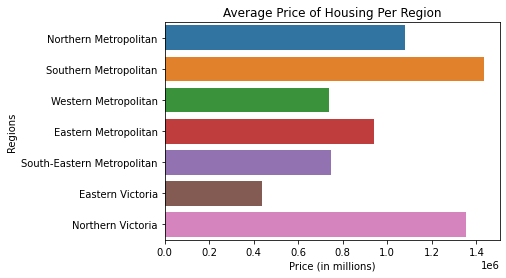

In [34]:
# Plot the average prices for each region in a bar chart
sns.barplot(data=df_clean, y='Regionname', x='Price', ci=False)

plt.ylabel('Regions')
plt.xlabel('Price (in millions)')
plt.title('Average Price of Housing Per Region')

Southern Metropolitan is the most expensive part of the city with an average housing costing a little over \\$1.4 million, while Eastern Victoria is the least expensive averaging a little over \\$400,000. 

Next, I am going to take a look at the pricing for each suburb per region.

In [35]:
df_clean.groupby(['Regionname', 'Suburb'])['Price'].agg(['mean', 'min', 'max'])

mean        min        max
Regionname           Suburb                                           
Eastern Metropolitan Blackburn North    706000.0   706000.0   706000.0
                     Bulleen           1280000.0  1280000.0  1280000.0
                     Doncaster          676600.0   452000.0   826000.0
                     Doncaster East    1120000.0  1120000.0  1120000.0
                     Forest Hill        948000.0   730000.0  1350000.0
...                                          ...        ...        ...
Western Metropolitan Taylors Hill       558000.0   558000.0   558000.0
                     West Footscray     752750.0   495000.0  1060000.0
                     Williams Landing   510000.0   510000.0   510000.0
                     Williamstown      1326000.0   830000.0  1860000.0
                     Yarraville         914750.0   709500.0  1120000.0

[101 rows x 3 columns]

In [36]:
# Find mean price of each suburb per region
avg_price_suburb_region = df_clean.groupby(['Regionname', 'Suburb'], as_index=False).Price.mean()
# Sort mean price in descending order
avg_price_suburb_region = avg_price_suburb_region.sort_values(['Price', 'Regionname'], ascending=[True, True])
avg_price_suburb_region

,Regionname,Suburb,Price
22,Northern Metropolitan,Craigieburn,3.100000e+05
27,Northern Metropolitan,Glenroy,3.815000e+05
94,Western Metropolitan,South Kingsville,4.200000e+05
9,Eastern Victoria,Pakenham,4.350000e+05
13,Northern Metropolitan,Brunswick West,4.600000e+05
...,...,...,...
55,Southern Metropolitan,Brighton,2.008200e+06
48,Southern Metropolitan,Ashburton,2.050000e+06
46,Southern Metropolitan,Albert Park,2.077500e+06
68,Southern Metropolitan,Kew,2.151000e+06


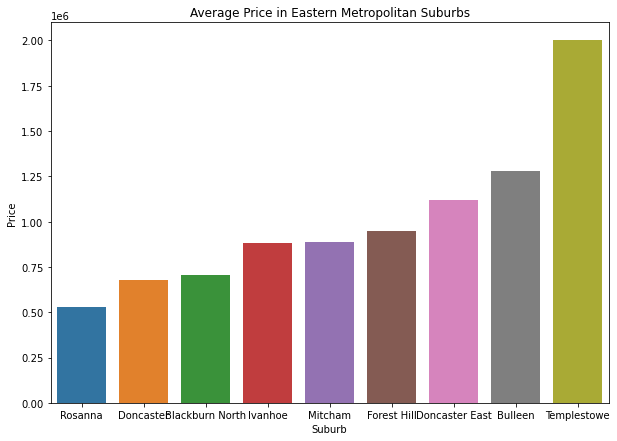

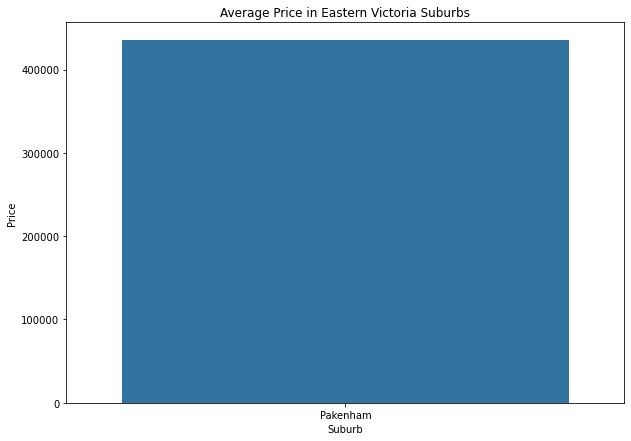

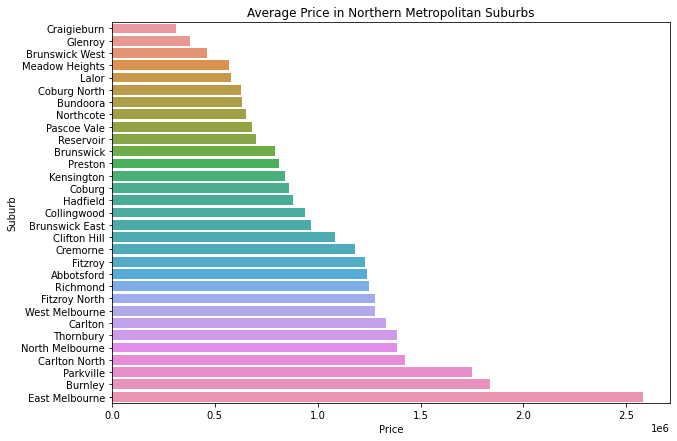

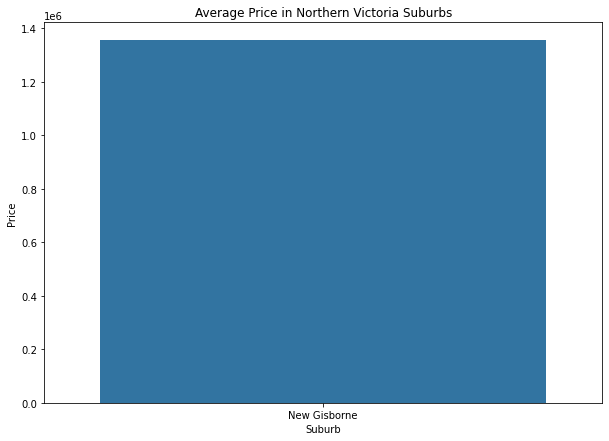

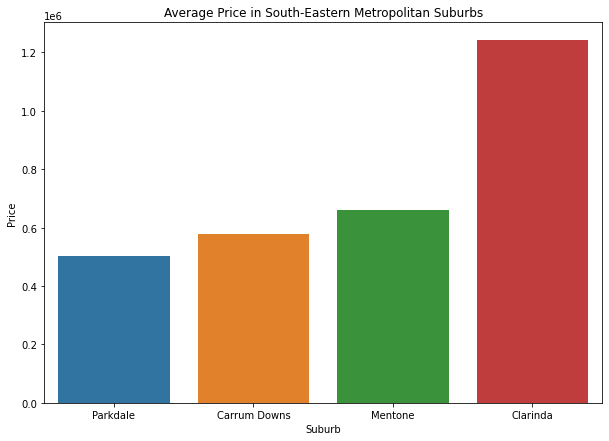

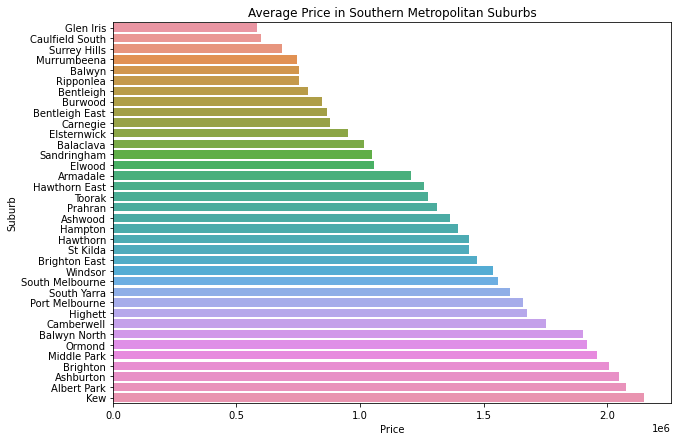

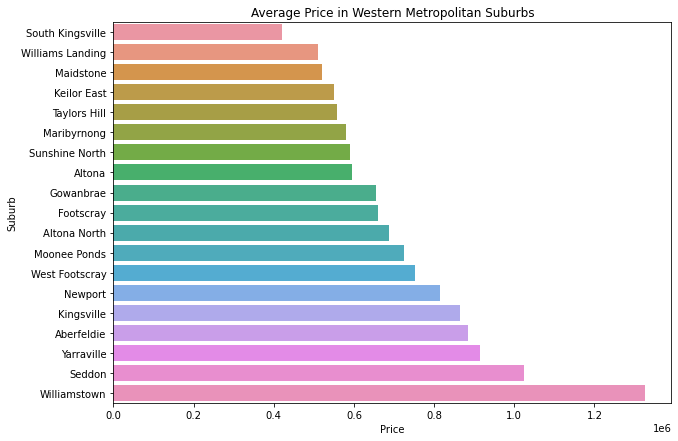

In [37]:
# Plot the average housing price of each suburb per region
region_suburb_count = avg_price_suburb_region.groupby('Regionname', as_index=False).Suburb.count()
regions = region_suburb_count.Regionname

for region in regions:
    # Create a mask to filter out suburbs of given region
    region_mask = avg_price_suburb_region['Regionname'] == region
    
    # Select all rows with the given region
    region_df = avg_price_suburb_region[region_mask]
    
    # Create bar plot to compare prices for each suburb in given region
    region_suburb_count_mask = region_suburb_count['Regionname'] == region
    plt.figure(figsize=(10, 7))
    
    # If the region contains a suburb count less than 10 use a vertical barplot, if not, horizontal bar plot
    if region_suburb_count[region_suburb_count_mask].Suburb.values[0] < 10:
        sns.barplot(data=region_df, x='Suburb', y='Price')
    else:
        sns.barplot(data=region_df, y='Suburb', x='Price')
        
    plt.title('Average Price in '+ str(region) + ' Suburbs')

The bar plots represent the average housing price for each suburb per region. When looking for housing in Melbourne, the graphs will be very useful in giving an idea of housing prices based on the buyers budget and their preferred region.


## Property Characteristics
Here we find out what the average number of rooms, bathrooms, and type of housing for different suburbs.

In [39]:
# What type of housing are in each region?
housing_type = df_clean.groupby(['Regionname', 'Type'])['Type'].count()
housing_type

Regionname                  Type
Eastern Metropolitan        h        5
                            t        4
                            u        5
Eastern Victoria            h        1
Northern Metropolitan       h       79
                            t       39
                            u       10
Northern Victoria           h        1
South-Eastern Metropolitan  h        2
                            t        1
                            u        1
Southern Metropolitan       h       64
                            t       31
                            u       12
Western Metropolitan        h       26
                            t       21
                            u        7
Name: Type, dtype: int64

Looking at this information, Northern, Southern, and Western Metropolitan are more residential areas as they contain houses and townhouses.

In [41]:
# What is the average number of rooms (bed and bath) per suburb
avg_rooms_per_suburb = df_clean.groupby(['Regionname', 'Suburb'], as_index=False).Rooms.mean().round()
avg_rooms_per_suburb

,Regionname,Suburb,Rooms
0,Eastern Metropolitan,Blackburn North,2.0
1,Eastern Metropolitan,Bulleen,4.0
2,Eastern Metropolitan,Doncaster,3.0
3,Eastern Metropolitan,Doncaster East,3.0
4,Eastern Metropolitan,Forest Hill,3.0
...,...,...,...
96,Western Metropolitan,Taylors Hill,3.0
97,Western Metropolitan,West Footscray,3.0
98,Western Metropolitan,Williams Landing,4.0
99,Western Metropolitan,Williamstown,4.0


<AxesSubplot:xlabel='Rooms', ylabel='Regionname'>

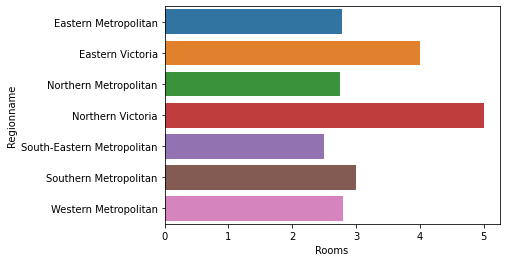

In [42]:
sns.barplot(data=avg_rooms_per_suburb, y='Regionname', x='Rooms', ci=False)

In [51]:
# What is the average number of bedrooms per suburb?
avg_bedroom_per_suburb = df_clean.groupby(['Regionname', 'Bedroom2'], as_index=False)['Bedroom2'].mean().round()
avg_bedroom_per_suburb

,Regionname,Bedroom2
0,Eastern Metropolitan,2.0
1,Eastern Metropolitan,3.0
2,Eastern Metropolitan,4.0
3,Eastern Victoria,4.0
4,Northern Metropolitan,1.0
5,Northern Metropolitan,2.0
6,Northern Metropolitan,3.0
7,Northern Metropolitan,4.0
8,Northern Victoria,5.0
9,South-Eastern Metropolitan,1.0


<AxesSubplot:xlabel='Bedroom2', ylabel='Regionname'>

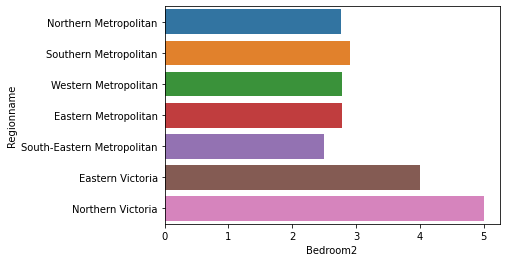

In [59]:
sns.barplot(data=df_clean, y='Regionname', x='Bedroom2', ci=False)

In [44]:
# What is the average number of bathrooms per suburb?
avg_bathroom_per_suburb = df_clean.groupby(['Regionname', 'Suburb'], as_index=False).Bathroom.mean().round()
avg_bathroom_per_suburb

,Regionname,Suburb,Bathroom
0,Eastern Metropolitan,Blackburn North,1.0
1,Eastern Metropolitan,Bulleen,1.0
2,Eastern Metropolitan,Doncaster,1.0
3,Eastern Metropolitan,Doncaster East,2.0
4,Eastern Metropolitan,Forest Hill,2.0
...,...,...,...
96,Western Metropolitan,Taylors Hill,2.0
97,Western Metropolitan,West Footscray,2.0
98,Western Metropolitan,Williams Landing,2.0
99,Western Metropolitan,Williamstown,2.0


<AxesSubplot:xlabel='Bathroom', ylabel='Regionname'>

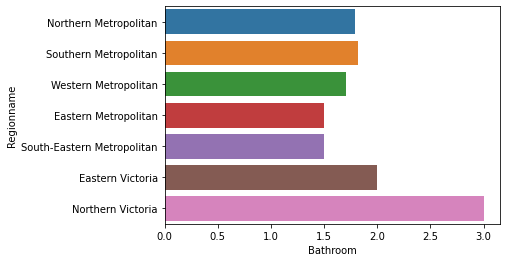

In [58]:
sns.barplot(data=df_clean, y='Regionname', x='Bathroom', ci=False)

<AxesSubplot:xlabel='Car', ylabel='Regionname'>

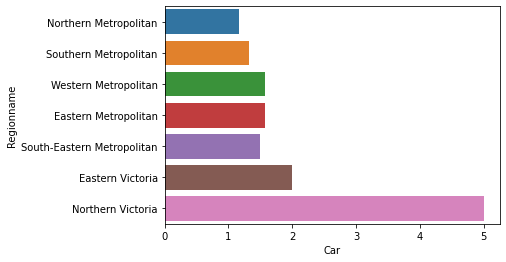

In [60]:
# Average number of car spots for each region
sns.barplot(data=df_clean, y='Regionname', x='Car', ci=False)

## Conclusion

- The average housing price in Melbourne is \\$1.13 million
- 75\% of housing costs above \\$750,000
- Housing 20km and less from the CBD costs can range between \\$500,000 to 2.5 million
- The most expensive region of Melbourne is Southern Metropolitan with an average price of \\$1.43 million
- The least expensive region is Eastern Victoria with an average price of \\$430,000
- Region Housing Price rankings:
    1. Southern Metropolitan - \\$1.43 million
    2. Northern Victoria - \\$1.36 million
    3. Northern Metropolitan - \\$1.08 million
    4. Eastern Metropolitan - \\$940,000
    5. South-Eastern Metropolitan - \\$746,000
    6. Western Metropolitan  - \\$738,000
    7. Eastern Victoria -\\$430,000
